In [69]:
portafoglio = [
    ('MMM', 2635.25),
    ('ACN', 1361.1),
    ('BABA', 339.62),
    ('CHK', 2601.27),
    ('MPW', 340.17),
    ('SRG.MI', 435.8),
    ('SNOW', 430.19),
    ('DIS', 101.59),
    ('EUNA.DE', 93.29),
    ('VWCE.DE', 3408.6),
]

# Creare il DataFrame
df = pd.DataFrame(dati, columns=['Stock', 'Amount'])

## Estrazione dati

In [24]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import yfinance as yf
from datetime import datetime
yf.pdr_override()
start_date = datetime(2010, 2, 12)  # Data di inizio
end_date = datetime.now()

actual_tickers = ['MMM', 'ACN', 'BABA', "CHK", 'MPW', 'SRG.MI', "SNOW", 'DIS' , "EUNA.DE", "VWCE.DE"]
n_actual_tickers = len(actual_tickers)

new_tickers = ["PLTR", "NVD","CRM"]
# new_tickers = ["UCG.MI", "TSM", "AMAT", "EOG", "NTES","VLO", "NUE", "STM", "TS", "STLD", "CF", "CHK"]

tickers = actual_tickers + new_tickers
total_tickers = len(tickers)
matrice_prezzi = pd.DataFrame()
for t in tickers:
    matrice_prezzi[t] = data.get_data_yahoo(t, start_date, end_date)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


#### Rendimenti annualizzati

In [25]:
from pypfopt.expected_returns import mean_historical_return

In [26]:
rendimenti = mean_historical_return(matrice_prezzi, returns_data=False, compounding=False, frequency=252, log_returns=False)
rendimenti

MMM        0.066575
ACN        0.206785
BABA       0.061550
CHK        0.314350
MPW        0.060916
SRG.MI     0.101483
SNOW       0.181519
DIS        0.138850
EUNA.DE   -0.009705
VWCE.DE    0.114891
PLTR       0.562976
NVD       -1.710436
CRM        0.271162
dtype: float64

#### Matrice di varianza e covarianza

In [27]:
from pypfopt.risk_models import risk_matrix
from pypfopt.risk_models import sample_cov
S = risk_matrix(matrice_prezzi, method='sample_cov')
S

,MMM,ACN,BABA,CHK,MPW,SRG.MI,SNOW,DIS,EUNA.DE,VWCE.DE,PLTR,NVD,CRM
MMM,0.050648,0.029261,0.023505,0.020004,0.030493,0.014802,0.021497,0.029134,0.000028,0.021155,0.030777,-0.005874,0.029173
ACN,0.029261,0.058719,0.034066,0.024115,0.032749,0.015610,0.061398,0.033204,0.000792,0.028660,0.060785,-0.032572,0.044539
BABA,0.023505,0.034066,0.175282,0.025712,0.029842,0.014465,0.117986,0.031764,-0.000066,0.029161,0.114115,-0.034077,0.050608
CHK,0.020004,0.024115,0.025712,0.148567,0.028493,0.010226,0.034797,0.032736,0.000213,0.014200,0.043934,-0.001365,0.029704
MPW,0.030493,0.032749,0.029842,0.028493,0.112369,0.018330,0.049319,0.034458,0.002098,0.031139,0.071803,-0.034429,0.037411
SRG.MI,0.014802,0.015610,0.014465,0.010226,0.018330,0.049461,0.004800,0.015067,0.001423,0.022046,0.007758,0.004209,0.015091
SNOW,0.021497,0.061398,0.117986,0.034797,0.049319,0.004800,0.418851,0.062761,0.005467,0.022882,0.239639,-0.096358,0.119639
DIS,0.029134,0.033204,0.031764,0.032736,0.034458,0.015067,0.062761,0.069065,0.000812,0.029197,0.071548,-0.020765,0.038443
EUNA.DE,0.000028,0.000792,-0.000066,0.000213,0.002098,0.001423,0.005467,0.000812,0.001940,0.000007,0.004692,-0.002798,0.000639
VWCE.DE,0.021155,0.028660,0.029161,0.014200,0.031139,0.022046,0.022882,0.029197,0.000007,0.029801,0.026705,-0.017971,0.028057


#### Pesi dell'investimento attuale
NB: il dizionario contiene i valori attulmente investiti.

Da questi vengono calcolati i pesi attuali e pesi nuovi

I pesi nuovi tengono in considerazione del margine disponibile che si vuole investire

In [28]:
#Pesi attuali

diz_valore_investito = {
'MMM':2635.25,
'ACN':1361.1,
'BABA':339.62,
'CHK':2601.27,
'MPW':340.17,
'SRG.MI':435.8,
'SNOW':430.19,
'DIS':101.59,
'EUNA.DE':93.29,
'VWCE.DE':3408.6,
}



valore_investito = np.array(list(diz_valore_investito.values()))
totale_investito = valore_investito.sum()
pesi_actual = (valore_investito)/totale_investito
margine_disponibile = 1000

pesi_nuovi = valore_investito/(totale_investito+margine_disponibile)

#### Rendimento complessivo con pesi attuali

In [29]:
rendimenti_stocks = (np.dot(rendimenti[actual_tickers], pesi_actual))
print(f"Il rendimento totale annualizzato è pari al  {round(rendimenti_stocks * 100, 2)}%")

Il rendimento totale annualizzato è pari al  15.69%


#### Varianza e Volatilità complessiva del portafoglio attuale

In [30]:
S_actual = S.loc[actual_tickers, actual_tickers]

In [31]:
S_actual

,MMM,ACN,BABA,CHK,MPW,SRG.MI,SNOW,DIS,EUNA.DE,VWCE.DE
MMM,0.050648,0.029261,0.023505,0.020004,0.030493,0.014802,0.021497,0.029134,0.000028,0.021155
ACN,0.029261,0.058719,0.034066,0.024115,0.032749,0.015610,0.061398,0.033204,0.000792,0.028660
BABA,0.023505,0.034066,0.175282,0.025712,0.029842,0.014465,0.117986,0.031764,-0.000066,0.029161
CHK,0.020004,0.024115,0.025712,0.148567,0.028493,0.010226,0.034797,0.032736,0.000213,0.014200
MPW,0.030493,0.032749,0.029842,0.028493,0.112369,0.018330,0.049319,0.034458,0.002098,0.031139
SRG.MI,0.014802,0.015610,0.014465,0.010226,0.018330,0.049461,0.004800,0.015067,0.001423,0.022046
SNOW,0.021497,0.061398,0.117986,0.034797,0.049319,0.004800,0.418851,0.062761,0.005467,0.022882
DIS,0.029134,0.033204,0.031764,0.032736,0.034458,0.015067,0.062761,0.069065,0.000812,0.029197
EUNA.DE,0.000028,0.000792,-0.000066,0.000213,0.002098,0.001423,0.005467,0.000812,0.001940,0.000007
VWCE.DE,0.021155,0.028660,0.029161,0.014200,0.031139,0.022046,0.022882,0.029197,0.000007,0.029801


In [32]:
varianza_stocks = np.dot(pesi_actual.T, np.dot(S_actual, pesi_actual ))
varianza_stocks

0.03209409477865763

In [33]:
volatilita_stocks = np.sqrt(varianza_stocks)
print(f"La volatilità totale annualizzata è pari al {round(volatilita_stocks * 100, 2)}%")

La volatilità totale annualizzata è pari al 17.91%


------------------

#### Ricalcolo dei rendimenti e matrice di varianza e covarianza
- mu  --> Rendimenti annualizzati
- S . --> Matrice di Varianza e Covarianza

In [34]:
from pypfopt.risk_models import CovarianceShrinkage
mu = mean_historical_return(matrice_prezzi, returns_data=False, compounding=False, frequency=252, log_returns=False)
S = CovarianceShrinkage(matrice_prezzi).ledoit_wolf()

#### Matrice dei pesi

La matrice dei pesi **w** contiene n_samples vettori

Ogni vettore è lungo total_tickers (tikers presenti nel portafoglio attuale + tikers di interesse).

Per i tickers presenti nel portafoglio attuale i pesi sono fissi. Questo perchè vogliamo generare il portafoglio ottimo a partire dal investimento attuale.

Per i ticker di interesse i pesi vengono generati in modo randomico. Questo perchè ci interessa generare tanti portafogli a partire dal portafoglio attuale.

NB: Ogni vettore restituisce come somma 1



In [35]:
actual_tickers

['MMM',
 'ACN',
 'BABA',
 'CHK',
 'MPW',
 'SRG.MI',
 'SNOW',
 'DIS',
 'EUNA.DE',
 'VWCE.DE']

In [36]:
import numpy as np
n_samples = 10000
# Generazione di valori casuali normalizzati negli ultimi 12 elementi di ogni array
random_values = np.random.rand(n_samples, total_tickers - n_actual_tickers)
normalized_values = random_values * (1-pesi_nuovi.sum()) / np.sum(random_values, axis=1, keepdims=True)

# Ripetizione dell'array di base per il numero di array desiderato
pesi_nuovi_repeated = np.tile(pesi_nuovi, (n_samples, 1))

# Combinazione dei valori fissi e quelli normalizzati
w = np.column_stack((pesi_nuovi_repeated, normalized_values))


#### Portafoglio best - max sharpe

In [37]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
ef.add_constraint(lambda x : x[:n_actual_tickers] >= pesi_nuovi) #assegno i pesi veri
ef.add_constraint(lambda x : x[11] <= 0.25) #assegno i pesi veri

weights_max_sharpe = ef.max_sharpe()
# weights_max_sharpe = ef.efficient_return(0.20)
ef.portfolio_performance(verbose=True)

weights_max_sharpe

Expected annual return: 18.9%
Annual volatility: 11.7%
Sharpe Ratio: 1.45


OrderedDict([('MMM', 0.2067368642365818),
             ('ACN', 0.1067790706431692),
             ('BABA', 0.0266433825375308),
             ('CHK', 0.2040711138725711),
             ('MPW', 0.0266865303509565),
             ('SRG.MI', 0.0341887583471406),
             ('SNOW', 0.0337486506501983),
             ('DIS', 0.0079697933925792),
             ('EUNA.DE', 0.0073186536627002),
             ('VWCE.DE', 0.2674066124416328),
             ('PLTR', 0.0784505698649395),
             ('NVD', 0.0),
             ('CRM', 0.0)])

### Plotting EfficientFrontier

C:\Users\Libero\miniconda3\envs\finance\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


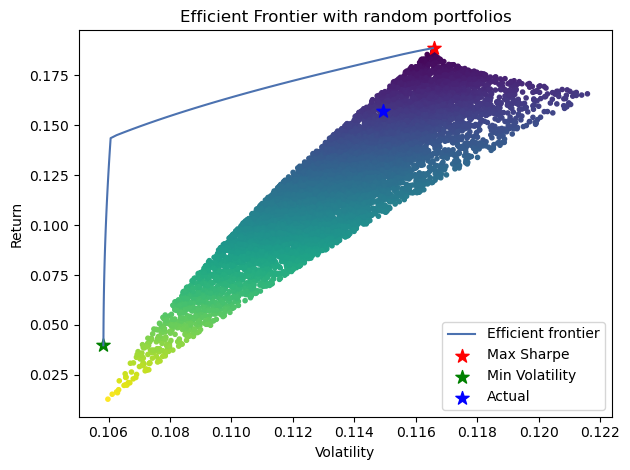

Pesi Max Sharpe:
MMM: 20.67% | ACN: 10.68% | BABA: 2.66% | CHK: 20.41% | MPW: 2.67% | SRG.MI: 3.42% | SNOW: 3.37% | DIS: 0.8% | EUNA.DE: 0.73% | VWCE.DE: 26.74% | PLTR: 7.85% | NVD: 0.0% | CRM: 0.0% | 
Expected annual return: 18.9%
Annual volatility: 11.7%
Sharpe Ratio: 1.45


Pesi Portfolio Actual:
MMM: 20.67% | ACN: 10.68% | BABA: 2.66% | CHK: 20.41% | MPW: 2.67% | SRG.MI: 3.42% | SNOW: 3.37% | DIS: 0.8% | EUNA.DE: 0.73% | VWCE.DE: 26.74% | 
Expected annual return: 15.7%
Annual volatility: 11.5%
Sharpe Ratio: 1.19


In [38]:

from pypfopt import plotting
import matplotlib.pyplot as plt
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
ef.add_constraint(lambda x : x[:n_actual_tickers] >= pesi_nuovi)#assegno i pesi veri
# ef.add_constraint(lambda x : x[11] <= 0.25)
fig, ax = plt.subplots()

ef_max_sharpe = ef.deepcopy()
ef_min_volatility = ef.deepcopy()
ef_efficient_risk = ef.deepcopy()
ef_efficient_return = ef.deepcopy()

plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Generate random portfolios
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds # !!! porque no resta la taso libre de riesgo?
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Trovo il portafoglio con sharpe massimo. il calcolo usa la tasa libre de riesgo
weights_max_sharpe = ef_max_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Trovo il portafoglio con la minore volatilità
weights_min_volatility = ef_min_volatility.min_volatility()
ret_tangent, std_tangent, _  = ef_min_volatility.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="g", label="Min Volatility")

# #Trovo il portafoglio con un livello di rischio
# weights_efficient_risk = ef_efficient_risk.efficient_risk(0.113)
# ret_tangent, std_tangent, _  = ef_efficient_risk.portfolio_performance()
# ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="y", label="Efficient Risk")

# #Trovo il portafoglio con un livello di rendimento
# weights_efficient_return = ef_efficient_return.efficient_return(0.214)
# ret_tangent, std_tangent, _  = ef_efficient_return.portfolio_performance()
# ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="orange", label="Efficient Return")

# Portafoglio attuale
ef = EfficientFrontier(mu[actual_tickers], S.loc[actual_tickers,actual_tickers], weight_bounds=(0, 1))
ef.add_constraint(lambda x: x == pesi_actual)#assegno i pesi veri
ef_actual = ef.deepcopy()
weights_actual = ef_actual.max_sharpe()#trovo il max_sharpe per i pesi attuali.
ret_tangent, std_tangent, _ = ef_actual.portfolio_performance() #le performance coincidono con rendimenti_stocks e volatilita_stocks
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="b", label="Actual")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()


print("Pesi Max Sharpe:")
for chiave, valore in weights_max_sharpe.items():
    print(f"{chiave}: {round(valore * 100, 2)}%", end=" | ")
print()
ef_max_sharpe.portfolio_performance(verbose=True);

print("\n\nPesi Portfolio Actual:")
#Rapporto i pesi attuali in modo da poter confrontare con i pesi nuovi
somma_pesi_nuovi = pesi_nuovi.sum()
weights_actual_rapportati = {chiave: valore * somma_pesi_nuovi for chiave, valore in weights_actual.items()}

for chiave, valore in weights_actual_rapportati.items():
    print(f"{chiave}: {round(valore * 100, 2)}%", end=" | ")
print()
ef_actual.portfolio_performance(verbose=True);

# print("\n\nPesi Min Volatility:")
# for chiave, valore in weights_min_volatility.items():
#     print(f"{chiave}: {round(valore * 100, 2)}%", end=" | ")
# print()
# ef_min_volatility.portfolio_performance(verbose=True);

# print("\n\nPesi Efficient Risk:")
# for chiave, valore in weights_efficient_risk.items():
#     print(f"{chiave}: {round(valore * 100, 2)}%", end=" | ")
# print()
# ef_efficient_risk.portfolio_performance(verbose=True);

# print("\n\nPesi Efficient Return:")
# for chiave, valore in weights_efficient_return.items():
#     print(f"{chiave}: {round(valore * 100, 2)}%", end=" | ")
# print()
# ef_efficient_return.portfolio_performance(verbose=True);

In [62]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(matrice_prezzi)
da = DiscreteAllocation(weights_max_sharpe, latest_prices, total_portfolio_value=11334)
allocation, leftover = da.lp_portfolio()
print(allocation)

{'MMM': 25, 'ACN': 3, 'BABA': 4, 'CHK': 30, 'MPW': 76, 'SRG.MI': 88, 'SNOW': 2, 'DIS': 1, 'EUNA.DE': 17, 'VWCE.DE': 27, 'PLTR': 35}


C:\Users\Libero\miniconda3\envs\finance\lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
